<a href="https://colab.research.google.com/github/marcinmichalsmolen/adam/blob/main/MGR4_CIFAR10_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CIFAR-10 

In [ ]:
from keras.datasets import cifar10 as dataset
from tensorflow.keras.utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import Adam
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt
import time, pickle
%matplotlib inline
draw_sample(X_train, y_train, 0, 3, 5)

In [ ]:
def load_data():
  (X_train, y_train), (X_test, y_test) = dataset.load_data()
#konwersja wektorów y_train i y_test do formatu one-hot
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  return X_train, y_train, X_test, y_test
def normalize_pixels(tmp_train, tmp_test):
# Zamiana na zmiennoprzecinkowe
  X_train = tmp_train.astype('float32')
  X_test = tmp_test.astype('float32')
# Normalizacja
  X_train = X_train / 255.0
  X_test = X_test / 255.0
  return X_train, X_test

In [ ]:
def define_model_1(learning_rate=0.001, decay_rate=0.0):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    optimizer = Adam(lr=learning_rate, decay=decay_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
def summarize_diagnostics(history):
  pyplot.title('Dokładność klasyfikacji')
  pyplot.plot(history.history['accuracy'], color='orange', label='train')
  pyplot.plot(history.history['val_accuracy'], color='green', label='test')
  pyplot.subplots_adjust (right=2)
  pyplot.show()

def summarize_diagnostics2(history):
  pyplot.title('Model loss')
  pyplot.plot(history.history['loss'], color='red', label='train')
  pyplot.plot(history.history['val_loss'], color='blue', label='test')
  pyplot.subplots_adjust (right=2)
  pyplot.show()

def run_model(model_number):
  output = model_number.fit(X_train, y_train, epochs=100, batch_size=1024, validation_split=(0.2),callbacks=[callbacks])
  # evaluate model
  _, acc = model_number.evaluate(X_test, y_test)
  print('Accuracy = %.3f' % (acc * 100.0))
  summarize_diagnostics(output)
  summarize_diagnostics2(output)
  return

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               921728    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 923,914
Trainable params: 923,914
Non-trainable params: 0
__________________________________________________

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/100
40/40 [==============================] - 11s 37ms/step - loss: 1.9487 - accuracy: 0.3030 - val_loss: 1.7657 - val_accuracy: 0.3828
Epoch 2/100
40/40 [==============================] - 1s 23ms/step - loss: 1.6284 - accuracy: 0.4357 - val_loss: 1.5733 - val_accuracy: 0.4532
Epoch 3/100
40/40 [==============================] - 1s 28ms/step - loss: 1.5000 - accuracy: 0.4771 - val_loss: 1.4991 - val_accuracy: 0.4783
Epoch 4/100
40/40 [==============================] - 1s 19ms/step - loss: 1.4292 - accuracy: 0.4997 - val_loss: 1.4340 - val_accuracy: 0.4991
Epoch 5/100
40/40 [==============================] - 1s 20ms/step - loss: 1.3588 - accuracy: 0.5271 - val_loss: 1.4114 - val_accuracy: 0.5102
Epoch 6/100
40/40 [==============================] - 1s 20ms/step - loss: 1.3107 - accuracy: 0.5458 - val_loss: 1.3434 - val_accuracy: 0.5333
Epoch 7/100
40/40 [==============================] - 1s 19ms/step - loss: 1.2639 - accuracy: 0.5615 - val_loss: 1.3219 - val_accuracy: 0.5390


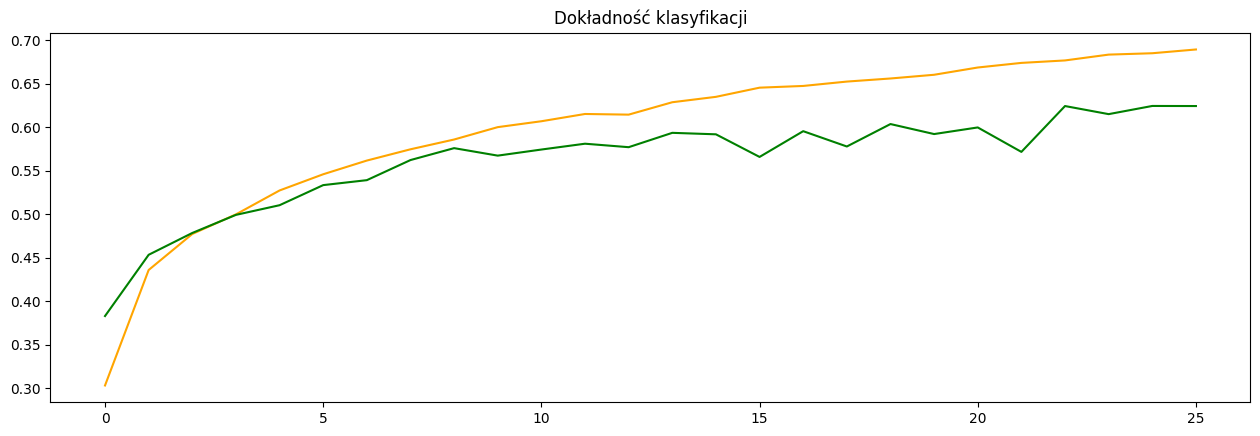

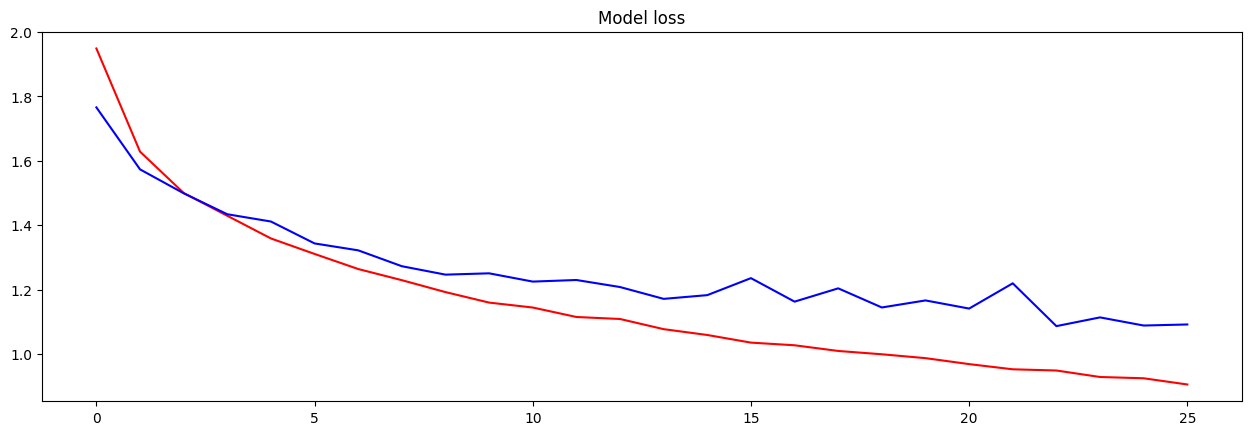

Training: accuracy = 0.679980  ;  loss = 0.939251
Validation: accuracy1 = 0.620400  ;  loss1 = 1.087670


In [ ]:
X_train, y_train, X_test, y_test = load_data()
X_train, X_test = normalize_pixels(X_train, X_test)
callbacks = EarlyStopping(monitor='val_loss', mode='min', patience=3)
model_1 = define_model_1()
print(model_1.summary())
graph_output = run_model(model_1)
loss, accuracy = model_1.evaluate(X_train, y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))
loss, accuracy = model_1.evaluate(X_test, y_test, verbose=0)
print("Validation: accuracy1 = %f  ;  loss1 = %f" % (accuracy, loss))

In [ ]:
def define_model_2(learning_rate=0.0005, decay_rate=0.0001):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    optimizer = Adam(lr=learning_rate, decay=decay_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                      

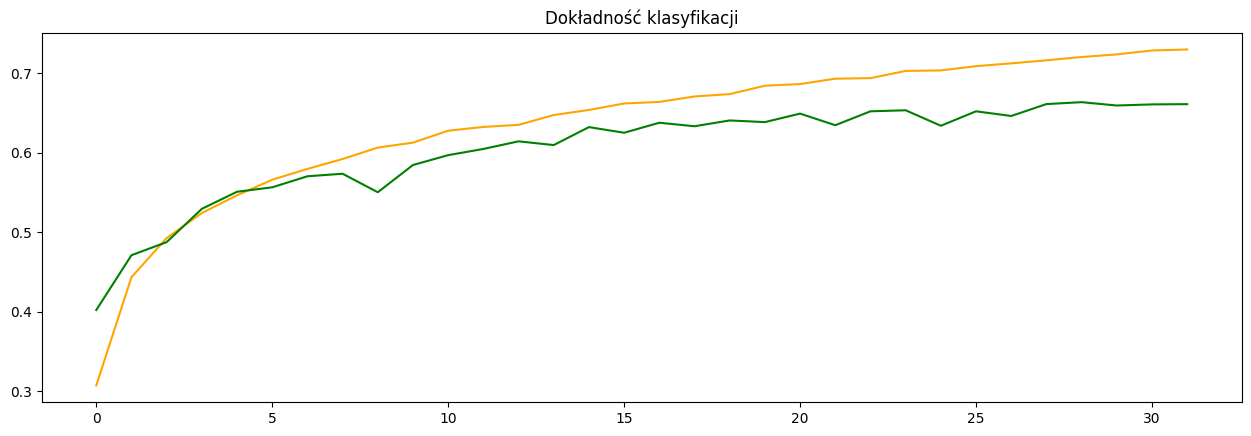

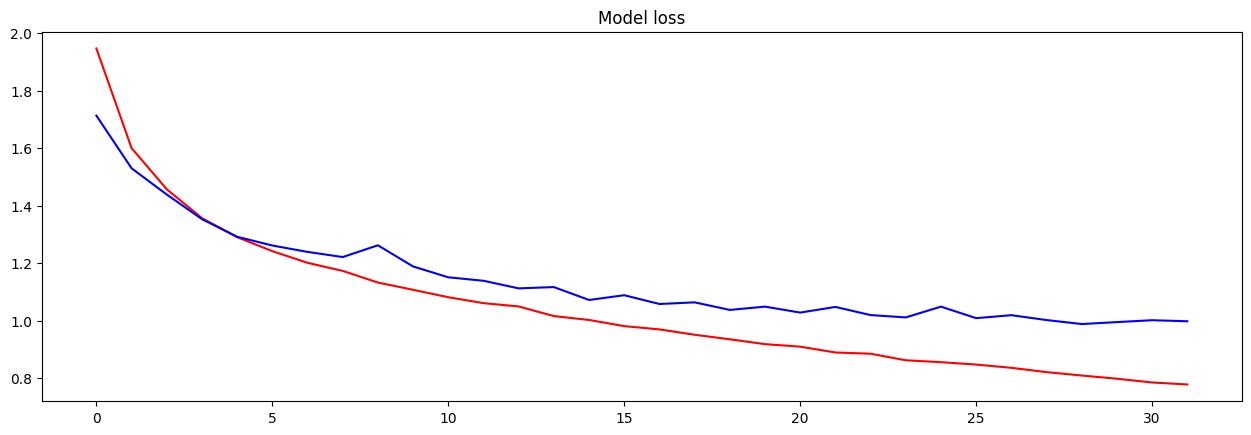

Training: accuracy = 0.742680  ;  loss = 0.768439
Validation: accuracy1 = 0.658700  ;  loss1 = 0.989193


In [ ]:
X_train2, y_train2, X_test2, y_test2 = load_data()
X_train2, X_test2 = normalize_pixels(X_train2, X_test2)
callbacks = EarlyStopping(monitor='val_loss', mode='min', patience=3)
model_2 = define_model_2()
print(model_2.summary())
graph_output = run_model(model_2)
loss, accuracy = model_2.evaluate(X_train2, y_train2, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))
loss, accuracy = model_2.evaluate(X_test2, y_test2, verbose=0)
print("Validation: accuracy1 = %f  ;  loss1 = %f" % (accuracy, loss))

In [ ]:
def define_model_3():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.25))
	model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.25))
	model.add(Flatten())
	model.add(Dense(512, activation='relu'))
	model.add(Dropout(0.25))
	model.add(Dense(128, activation='relu'))
	model.add(Dense(10, activation='softmax'))
 
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

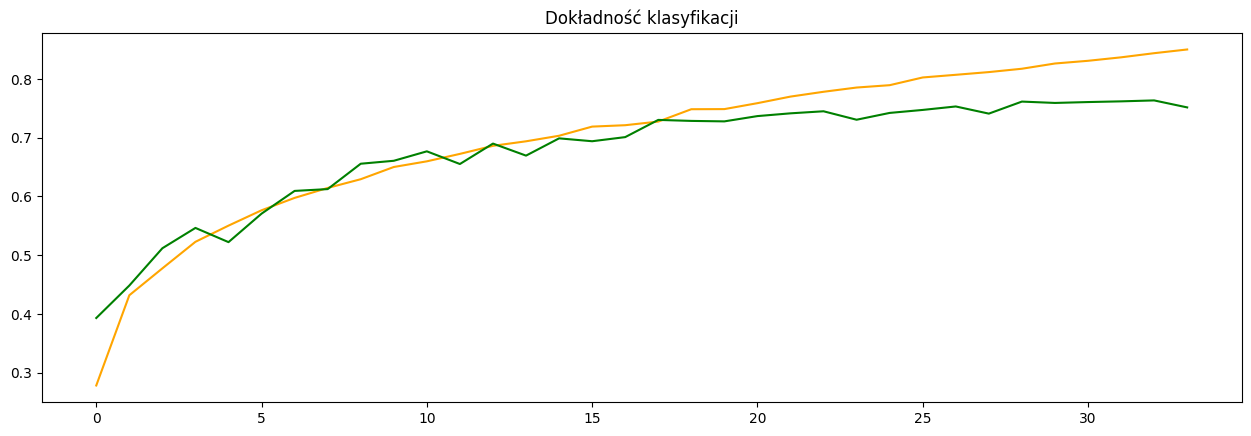

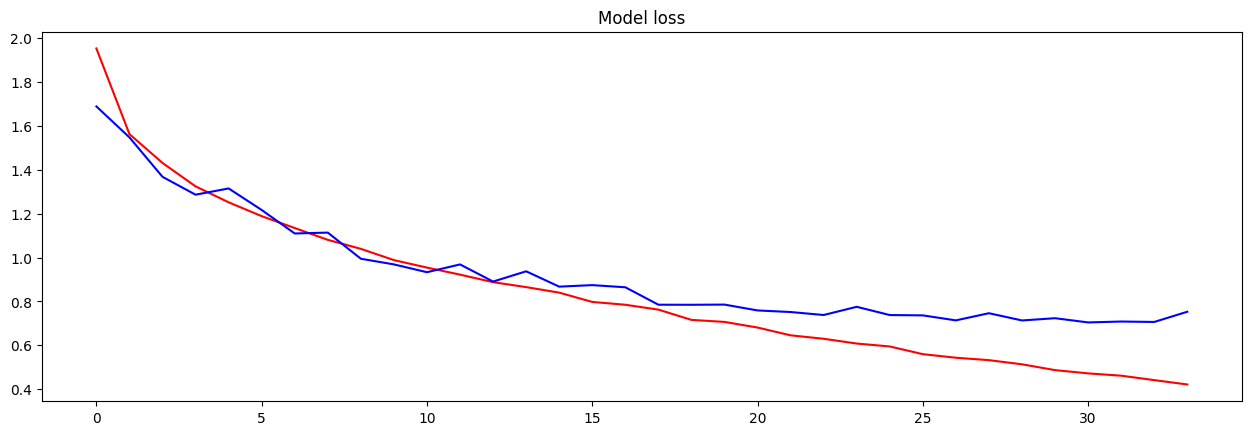

Training: accuracy = 0.890000  ;  loss = 0.350064
Validation: accuracy1 = 0.752300  ;  loss1 = 0.758157


In [ ]:
X_train3, y_train3, X_test3, y_test3 = load_data()
X_train3, X_test3 = normalize_pixels(X_train3, X_test3)
callbacks = EarlyStopping(monitor='val_loss', mode='min', patience=3)
model_3 = define_model_3()
print(model_3.summary())
graph_output = run_model(model_3)
loss, accuracy = model_3.evaluate(X_train3, y_train3, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))
loss, accuracy = model_3.evaluate(X_test3, y_test3, verbose=0)
print("Validation: accuracy1 = %f  ;  loss1 = %f" % (accuracy, loss))

In [ ]:
def define_model_4():
    model = Sequential()
    model.add(RandomFlip("horizontal", input_shape=(150, 150, 3))),
    model.add(RandomZoom(0.2, 0.2)),
    model.add(ccConv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),

    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),

    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(5, activation='softmax')
  
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  	return model

TabError: ignored